In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [179]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [180]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [181]:
intercept = np.ones((
    X.shape[0], 1)
)
X_b = np.concatenate(
    (intercept, X),
    axis=1
)

In [182]:
val_size = 0.2
test_size = 0.125
random_state = 1
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [183]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [184]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    
    return y_hat

In [185]:
def compute_loss(y_hat, y):
    y_hat = np.clip(
        y_hat, 1e-7, 1 - 1e-7
    )
    return (
        -y * \
        np.log(y_hat) - (1 - y) * \
        np.log(1 - y_hat)
    ).mean()

In [186]:
def compute_gradient(X, y, y_hat):
    return np.dot(
        X.T, (y_hat - y)
    ) / y.size
    
def update_theta(theta, gradient, lr):
    return theta - lr * gradient

In [187]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    
    return acc

In [188]:
lr = 0.01
epochs = 200
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [189]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_loesses = []
    train_batch_accs = []
    val_batch_loesses = []
    val_batch_accs = []
    
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        y_hat = predict(X_i, theta)
        
        train_loss = compute_loss(y_hat, y_i)
        
        gradient = compute_gradient(X_i, y_i, y_hat)
        
        theta = update_theta(theta, gradient, lr)
        
        train_batch_loesses.append(train_loss)
        
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_loesses.append(val_loss)
        
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
        
    train_batch_loss = sum(train_batch_loesses) / len(train_batch_loesses)
    val_batch_loss = sum(val_batch_loesses) / len(val_batch_loesses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    
    print(f'\nEPOCH {epoch +1 }: \tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')
    
    
            


EPOCH 1: 	Training loss: 2.411	Validation loss: 1.931

EPOCH 2: 	Training loss: 1.879	Validation loss: 1.744

EPOCH 3: 	Training loss: 1.714	Validation loss: 1.672

EPOCH 4: 	Training loss: 1.690	Validation loss: 1.651

EPOCH 5: 	Training loss: 1.682	Validation loss: 1.643

EPOCH 6: 	Training loss: 1.658	Validation loss: 1.603

EPOCH 7: 	Training loss: 1.773	Validation loss: 1.644

EPOCH 8: 	Training loss: 1.739	Validation loss: 1.626

EPOCH 9: 	Training loss: 1.714	Validation loss: 1.612

EPOCH 10: 	Training loss: 1.692	Validation loss: 1.598

EPOCH 11: 	Training loss: 1.671	Validation loss: 1.585

EPOCH 12: 	Training loss: 1.654	Validation loss: 1.572

EPOCH 13: 	Training loss: 1.642	Validation loss: 1.560

EPOCH 14: 	Training loss: 1.633	Validation loss: 1.550

EPOCH 15: 	Training loss: 1.596	Validation loss: 1.526

EPOCH 16: 	Training loss: 1.539	Validation loss: 1.493

EPOCH 17: 	Training loss: 1.502	Validation loss: 1.476

EPOCH 18: 	Training loss: 1.478	Validation loss: 1.475



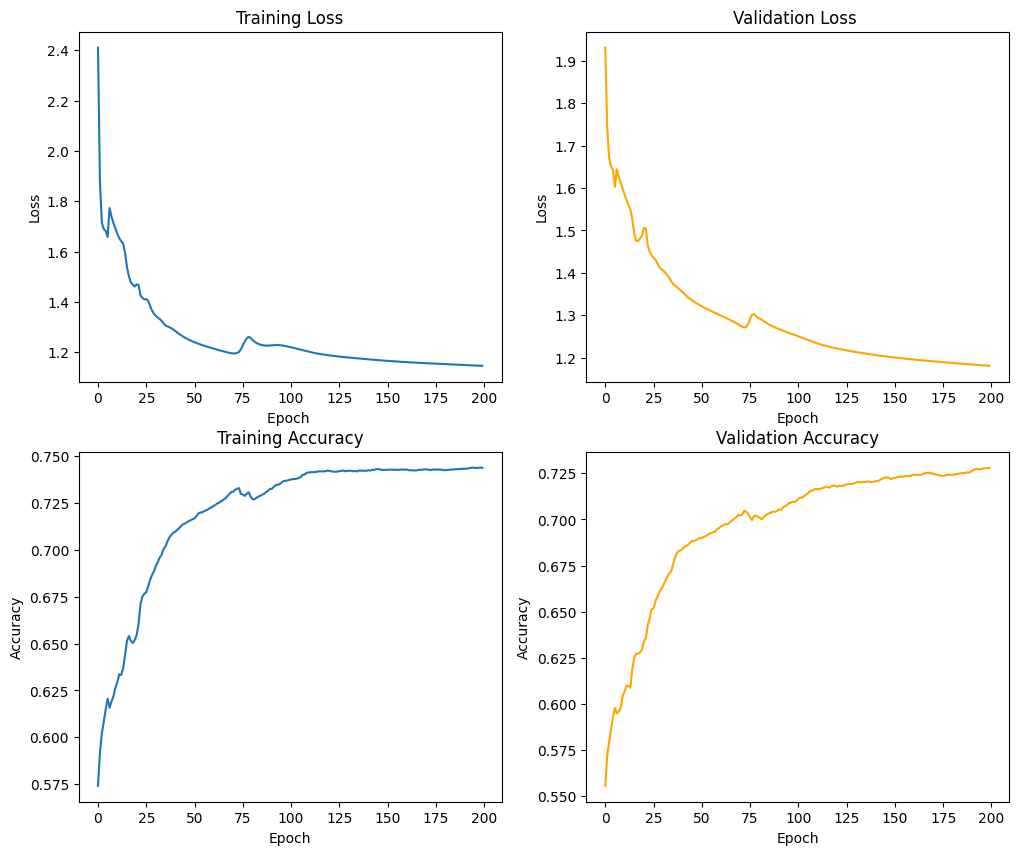

In [190]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch ', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss ')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs , 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [191]:
val_set_acc = compute_accuracy(X_val , y_val , theta)
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.7821229050279329
Accuracy : 0.7342657342657343
